
Training a Classifier
=====================

[source ](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a `torch.*Tensor`.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size **3x32x32**, i.e. 3-channel color images of 32x32 pixels in size.

![alt text](https://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data



# 0. Before everything else


## Debugging 


**The Pytorch debugger is awesome**

- h(help): Print help

- n(ext): Continue execution until the next line in the current function is reached or it returns.

- s(tep): Execute the current line, stop at the first possible occasion (either in a function that is called or in the current function).
- r(eturn): Continue execution until the current function returns.

- r(eturn): Continue execution until the current function returns.

- a(rgs): Print the argument list of the current function.




`error`? use the debugger. done? insert `exit`

In [0]:
# the basic imports
import torch
import torch.nn as nn # the neural network module
import torch.nn.functional as F 

In [0]:
# example 
from IPython.core.debugger import set_trace

# random data 
X = torch.rand((5, 3))

In [5]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        set_trace() # uncomment if want to debug
        x = self.lin(X)
        return X

# set model as our model    
model = MyModule()

# create instance and input argument X as data
y_ = model(X)

# check if the shape is the same
assert y_.shape == (5, 1), y_.shape

> <ipython-input-5-1497b30627cf>(8)forward()
      6     def forward(self, X):
      7         set_trace() # uncomment if want to debug
----> 8         x = self.lin(X)
      9         return X
     10 

ipdb> X
tensor([[0.5853, 0.7669, 0.2346],
        [0.2434, 0.2181, 0.9114],
        [0.1932, 0.9300, 0.3437],
        [0.7849, 0.9256, 0.3924],
        [0.7940, 0.3477, 0.8383]])
ipdb> next
> <ipython-input-5-1497b30627cf>(9)forward()
      7         set_trace() # uncomment if want to debug
      8         x = self.lin(X)
----> 9         return X
     10 
     11 # set model as our model

ipdb> locals()
{'X': tensor([[0.5853, 0.7669, 0.2346],
        [0.2434, 0.2181, 0.9114],
        [0.1932, 0.9300, 0.3437],
        [0.7849, 0.9256, 0.3924],
        [0.7940, 0.3477, 0.8383]]), 'self': MyModule(
  (lin): Linear(in_features=3, out_features=1, bias=True)
), 'x': tensor([[-0.7248],
        [-0.4928],
        [-0.6866],
        [-0.8286],
        [-0.6632]], grad_fn=<AddmmBackward>)}
ipdb> 

BdbQuit: ignored

# 1. Loading and normalizing CIFAR10


Using ``torchvision``, it’s extremely easy to load CIFAR10.



The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. ( get everything in the same scale )


find out more about [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html)



some [documentation](https://pytorch.org/docs/stable/_modules/torchvision/datasets/cifar.html#CIFAR10)


In [0]:
# torch computer vision inputs
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# specify details for the transformation, normalisation
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# get your training set
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# get your test set
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

# define name of classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


[dataloader ](https://pytorch.org/docs/stable/data.html`)


Let us show some of the training images, for fun.



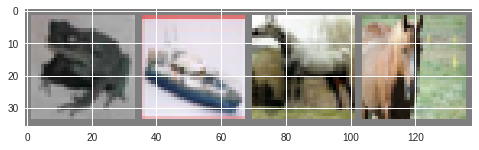

 frog  ship horse horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#2. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [0]:
# standard imports when using nn
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



- **Loss.** the error. The difference between the output and the ground truth labels.


- **Optimiser.** 

Our goal is to minimise this error, this is done by doing backpropagation. We nudge the weights and bias to minimise the error bit by bit. The weights are modified using an optimisation algorithm.


[source](https://jed-ai.github.io/py1_gd_animation/)
![alt text](https://jed-ai.github.io//images/python/py1/fig2.gif)


In [0]:
import torch.optim as optim
# define loss function
criterion = nn.CrossEntropyLoss()
# define optimiser
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [12]:
n = 2

for epoch in range(n):  # loop over the dataset multiple times 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data # get the inputs and ground truth labels

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %
                  #(epoch + 1, i + 1, running_loss / 2000))
          print(f"[{epoch+1},{i+1}] loss: {running_loss/2000}")
          running_loss = 0.0 # reset loss to zero

print('Finished Training')

[1,2000] loss: 1.2381885697543622
[1,4000] loss: 1.2181688833385707
[1,6000] loss: 1.2214140919446945
[1,8000] loss: 1.2234968360215426
[1,10000] loss: 1.1961908783763646
[1,12000] loss: 1.2082646555006504
[2,2000] loss: 1.118209489673376
[2,4000] loss: 1.1318027724027633
[2,6000] loss: 1.1177115248441696
[2,8000] loss: 1.1367645783424378
[2,10000] loss: 1.1359022942334414
[2,12000] loss: 1.1181102478951215
Finished Training


# 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



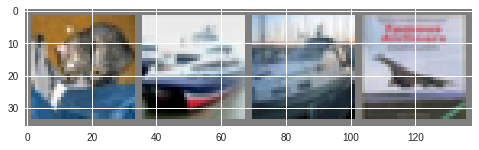

GroundTruth:    cat  ship  ship plane


In [14]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [17]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 73 %
Accuracy of  bird : 44 %
Accuracy of   cat : 49 %
Accuracy of  deer : 57 %
Accuracy of   dog : 46 %
Accuracy of  frog : 61 %
Accuracy of horse : 54 %
Accuracy of  ship : 73 %
Accuracy of truck : 72 %


Okay, so what next?

How do we run these neural networks on the GPU?

# Training on GPU

Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:



In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

# Cuda stuff etc

## Cuda stuff etc

The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = inputs.to(device), labels.to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.


